## Used Car Price Prediction:

* In this exercise, I perform exploratory data analysis, an essential step in car pricing prediction models to parse out the meaningful insights from the data.

* I compare models and relative performance to discern which model is performing relatively better and if there scope to improve the performance further.

* I propose a final solution design and key recommendations for implementing solutions. 


In [1]:
# Importing Libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score if required
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#algorithms to use if required
from sklearn.linear_model import LogisticRegression


#Metrics to evaluate the model if required
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

## Data Set

### The used_cars dataset contains the following attributes:

* S.No.: Serial Number
* Name: Name of the car which includes Brand name and Model name
* Location: The location in which the car is being sold or is available for purchase (Cities)
* Year: Manufacturing year of the car
* Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in KM
* Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
* Transmission: The type of transmission used by the car (Automatic / Manual)
* Owner: Type of ownership
* Mileage: The standard mileage offered by the car company in KMPL or KM/KG
* Engine: The displacement volume of the engine in CC
* Power: The maximum power of the engine in BHP
* Seats: The number of seats in the car
* New_Price: The price of a new car of the same model in INR 100,000
* Price: The price of the used car in INR 100,000

### The initial steps:

* Exploratory Data Analysis
* Data cleaning
* Data preparation
* Feature Engineering
    

In [2]:
df = pd.read_csv('used_cars.csv')

In [3]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [4]:
#Checking Information on data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


There are 7253 observations and 14 columns in the dataset:
* Categorical variables (Objects): Name, Location, Fuel_type, Transmission, Owner_type are objects
* Numerical Variables: S. No., Year, Kilometers_Driven, Price, New_Price, Seats, Power, Engine, and Mileage
* Missing Values in columns: Price, New_Price, Seats, Power, Engine, and Mileage 
* Missing values will be imputed for all variables except price since that is our target variable.. 

#### Target Variable is the column "Price"
#### Remainder of the columns are Independent Variables

In [5]:
# Find Percentage of missing values in each column

print('Percentage of missing values across columns-\n', df.isnull().mean().round(4)*100)


Percentage of missing values across columns-
 S.No.                 0.00
Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.03
Engine                0.63
Power                 2.41
Seats                 0.73
New_price            86.13
Price                17.01
dtype: float64


* There are missing values in Mileage, Engine, Power, Seats, New_Price, and Price columns.

* For our target variable (Price), which is the selling price for used cars, I will drop the missing value rows sice the purpose of this exercise is to predict those prices, and imputing missing values will not be prudent.

* New_price has about 86% values missing, so this column will be dropped since it makes no sense in imputing. It wll only result in overfitting the model.

* For the rest of the predictor variables, I will impute missing values.

In [6]:
# Find Unique values in dataset

df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               438
Engine                150
Power                 383
Seats                   8
New_price             625
Price                1373
dtype: int64

#### Next steps:

* The column "Name" of car is an identifier for each Brand/manufaturer. 
* The column Serial Number will be dropped as it serves no purpose in this exercise.
* The column New Price with disproportionate amounts of missing values, as mentioned earlier, will also be dropped.
* Numerical and categorical columns will be explored separately.
* Duplicate values will be checked for and dropped where required

In [7]:
# Splitting name of car brand to predict price 

brand = df["Name"].str.split(" ", expand = True)
df['Brand'] = brand[0]

In [8]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

* Notice that 'Isuzu' and 'ISUZU' appear as 2 separate brands. These will be merged as one since this is clearly a repetition

In [9]:
#merging Isuzu and ISUZU
df.Brand[df.Brand=='Isuzu']='ISUZU'

* Making a copy of original data and dropping columns not required for analysis

In [10]:

df1 = df.copy()
df = df.drop(['S.No.', 'New_price', 'Name'], axis=1)


In [11]:
#Finding duplicate values

df.duplicated().sum()

4

* There are 4 duplicate values in the dataset, which will be dropped

In [14]:

df.drop_duplicates(keep='first')

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,Volkswagen
7249,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,Volkswagen
7250,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,Nissan
7251,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,Volkswagen


* Calculating the Age of Car and dropping the column Year. 

In [15]:

import datetime

today = datetime.datetime.now().year
df['Age']= df['Year'].apply(lambda x:(today - x))
               
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Age
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,11
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,6
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,10
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,9
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,8


In [16]:
df = df.drop(['Year'], axis=1)

##### Numerical values play an important role in predicting  prices, the summary statistics of which are provided below.

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.00,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.17,18.16,21.10,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.00,1493.00,1968.00,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.00,94.00,138.10,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.00,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00
Age,7253.0,7.634634,3.254421,2.00,5.00,7.00,10.00,25.00


#### Observations

* The average Mileage is 18 kmpl with a variation of 4.6 kmpl.
* The average km driven by previous owner is around 58,699 but very wide variation occur here with the min. being only 171 km. and the 75th percentile at 73,000 km. This can potentially impact prices.
* The mean age of cars in years is 7.6 with a variation of 3.25 years. The newest cars are models from 2 yrs. ago, while some of the older cars are as old as 25 yrs.
* Large variation in max engine power measured in BHP are also observed, ranging from a minimum of 34.2 to a maximum of 616, and with an average of 112.765 BHP 
* In terms of the seating capacity, majority of cars can seat on average 5 passengers. The lowest seating capacity is that of a coupe model (seating 2), and the mamximum is 10 (probably a mini-van).
* In terms of price(in INR 100,000), the average price of used cars observed is INR 9.48 with a variation of INR 11.19. 


###### Checking for outliers in target variable 'Price'.

<AxesSubplot:xlabel='Price'>

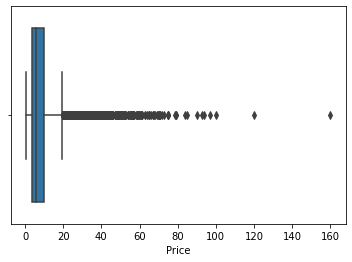

In [18]:
sns.boxplot(x=df['Price'])

* Price appears to be low for majority of cars, with outliers evident
* Applying log transformation to 'Price' to ensure a more normal distribution

AxesSubplot(0.125,0.125;0.775x0.755)


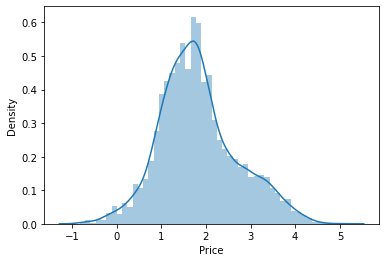

In [19]:

df['Price'] = np.log(df['Price'])
print(sns.distplot(df['Price']))

* Pair-Plots for visualizing data

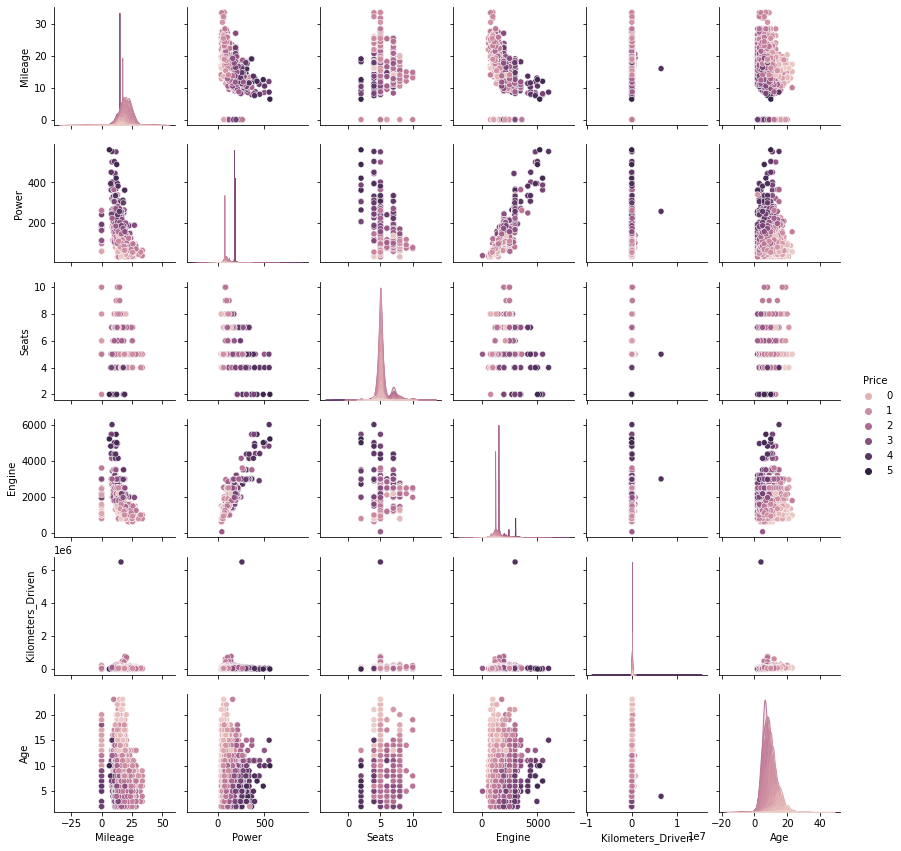

In [20]:

sns.pairplot(df, hue='Price',
             vars=['Mileage','Power','Seats', 'Engine', 'Kilometers_Driven', 'Age'], size=2)
plt.show()

* Heatmap to visualize data

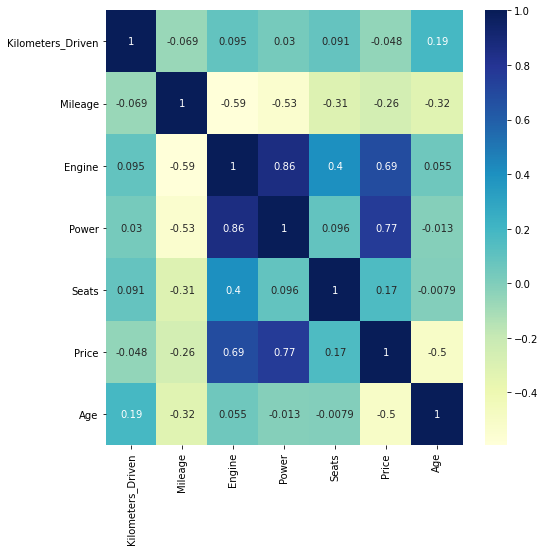

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

* Heatmap reveals that Price variable has strong positive correlation with Engine and Power.
* Price is negativly correlated with Kilometers driven, Age, and Mileage.
* Multicollinearity is observed: there is correlation between variables such as Engine, Mileage, Power, Size, Year. 
* Power and Engine appear to be the variables that have the highest correlation with price 


#### Accounting for improbable value in Km. driven

<AxesSubplot:xlabel='Kilometers_Driven'>

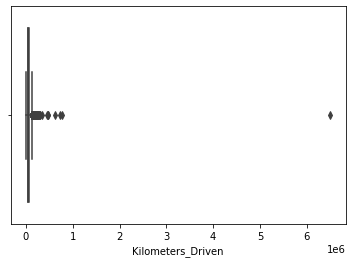

In [22]:
sns.boxplot(x=df['Kilometers_Driven'])

* There is a noticeable outlier here (a value of above 6000000 km) which is clearly an anomaly and is skewing the data. 

In [23]:
# Finding outlier value for KM. driven 1400
df['Kilometers_Driven'][df['Kilometers_Driven']>150000].sort_values(ascending=False)

2328    6500000
340      775000
1860     720000
358      620000
3092     480000
         ...   
1473     152000
4963     152000
3570     151000
2182     150386
6385     150152
Name: Kilometers_Driven, Length: 139, dtype: int64

In [24]:
# Replacing the extreme outlier with the most logical value (the Median for the column)
df.loc[:,'Kilometers_Driven'].median()

53416.0

In [25]:
df['Kilometers_Driven'][df['Kilometers_Driven']>775000]=53416

<AxesSubplot:xlabel='Kilometers_Driven'>

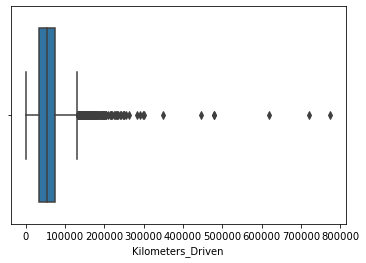

In [26]:
sns.boxplot(x=df['Kilometers_Driven'])

* Even after accounting for the one extreme improbable value, outliers are still evident here.

In [27]:
# Sorting mileage of cars in ascending order

df.sort_values(by='Mileage', ascending=True)

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Age
2597,Pune,70000,Petrol,Manual,First,0.00,1086.0,NaN,5.0,0.113329,Hyundai,14
2343,Hyderabad,74483,Petrol,Automatic,First,0.00,999.0,NaN,5.0,0.832909,Hyundai,15
5270,Bangalore,53000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,0.615186,Honda,19
424,Hyderabad,42021,Diesel,Manual,First,0.00,1968.0,NaN,5.0,1.695616,Volkswagen,11
6857,Mumbai,87000,Diesel,Automatic,First,0.00,2179.0,115.00,5.0,NaN,Land,10
...,...,...,...,...,...,...,...,...,...,...,...,...
3129,Delhi,74663,CNG,Manual,First,33.54,998.0,67.04,5.0,1.178655,Maruti,7
2059,Mumbai,54000,CNG,Manual,First,33.54,998.0,67.04,5.0,1.115142,Maruti,8
2371,Pune,29202,CNG,Manual,First,33.54,998.0,67.04,5.0,1.360977,Maruti,7
4446,Chennai,50000,Electric,Automatic,First,NaN,72.0,41.00,5.0,2.564949,Mahindra,5


* The Mileage of some cars equals 0, which is clearly not possile in case of used cars. Such values will be considered as missing and will be imputed.

In [28]:
# replacing '0' values for Mileage driven

df.query('Mileage ==0.00')['Mileage']


14      0.0
67      0.0
79      0.0
194     0.0
229     0.0
       ... 
6633    0.0
6697    0.0
6857    0.0
6957    0.0
7226    0.0
Name: Mileage, Length: 81, dtype: float64

In [29]:
df['Mileage'] = df['Mileage'].replace(0, np.nan)



#### Categorical variable conversion after splitting data into numerical/categorical

In [30]:
#Creating numerical columns
num_cols=['Age','Kilometers_Driven','Mileage','Power','Seats','Price', 'Engine']

#Creating categorical variables 
cat_cols= ['Transmission', 'Fuel_Type', 'Owner_Type', 'Location', 'Brand']

* Converting the categorical data into labels

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer


le_Brand = LabelEncoder()
le_Fuel_Type = LabelEncoder()
le_Owner_Type = LabelEncoder()
le_Transmission = LabelEncoder()
le_Location = LabelEncoder()

df['Brand'] =le_Brand.fit_transform(df['Brand'])
df['Fuel_Type'] =le_Brand.fit_transform(df['Fuel_Type'])
df['Owner_Type'] =le_Brand.fit_transform(df['Owner_Type'])
df['Transmission'] =le_Brand.fit_transform(df['Transmission'])
df['Location'] =le_Brand.fit_transform(df['Location'])

df

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Age
0,9,72000,0,1,0,26.60,998.0,58.16,5.0,0.559616,18,11
1,10,41000,1,1,0,19.67,1582.0,126.20,5.0,2.525729,11,6
2,2,46000,4,1,0,18.20,1199.0,88.70,5.0,1.504077,10,10
3,2,87000,1,1,0,20.77,1248.0,88.76,7.0,1.791759,18,9
4,3,40670,1,0,2,15.20,1968.0,140.80,5.0,2.875822,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...
7248,5,89411,1,1,0,20.54,1598.0,103.60,5.0,NaN,30,10
7249,9,59000,4,0,0,17.21,1197.0,103.60,5.0,NaN,30,6
7250,8,28000,1,1,0,23.08,1461.0,63.10,5.0,NaN,22,9
7251,10,52262,4,0,3,17.20,1197.0,103.60,5.0,NaN,30,8


In [32]:
# Imputing missing values using KNN Imputer

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(imputed, columns=df.columns)

In [33]:
# Re-check missing values
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7253 non-null   float64
 1   Kilometers_Driven  7253 non-null   float64
 2   Fuel_Type          7253 non-null   float64
 3   Transmission       7253 non-null   float64
 4   Owner_Type         7253 non-null   float64
 5   Mileage            7253 non-null   float64
 6   Engine             7253 non-null   float64
 7   Power              7253 non-null   float64
 8   Seats              7253 non-null   float64
 9   Price              7253 non-null   float64
 10  Brand              7253 non-null   float64
 11  Age                7253 non-null   float64
dtypes: float64(12)
memory usage: 680.1 KB


In [34]:
# Price variables has missing entries which will be dropped since price is the response variable 
df_imputed.dropna(subset=['Price'], inplace=True)

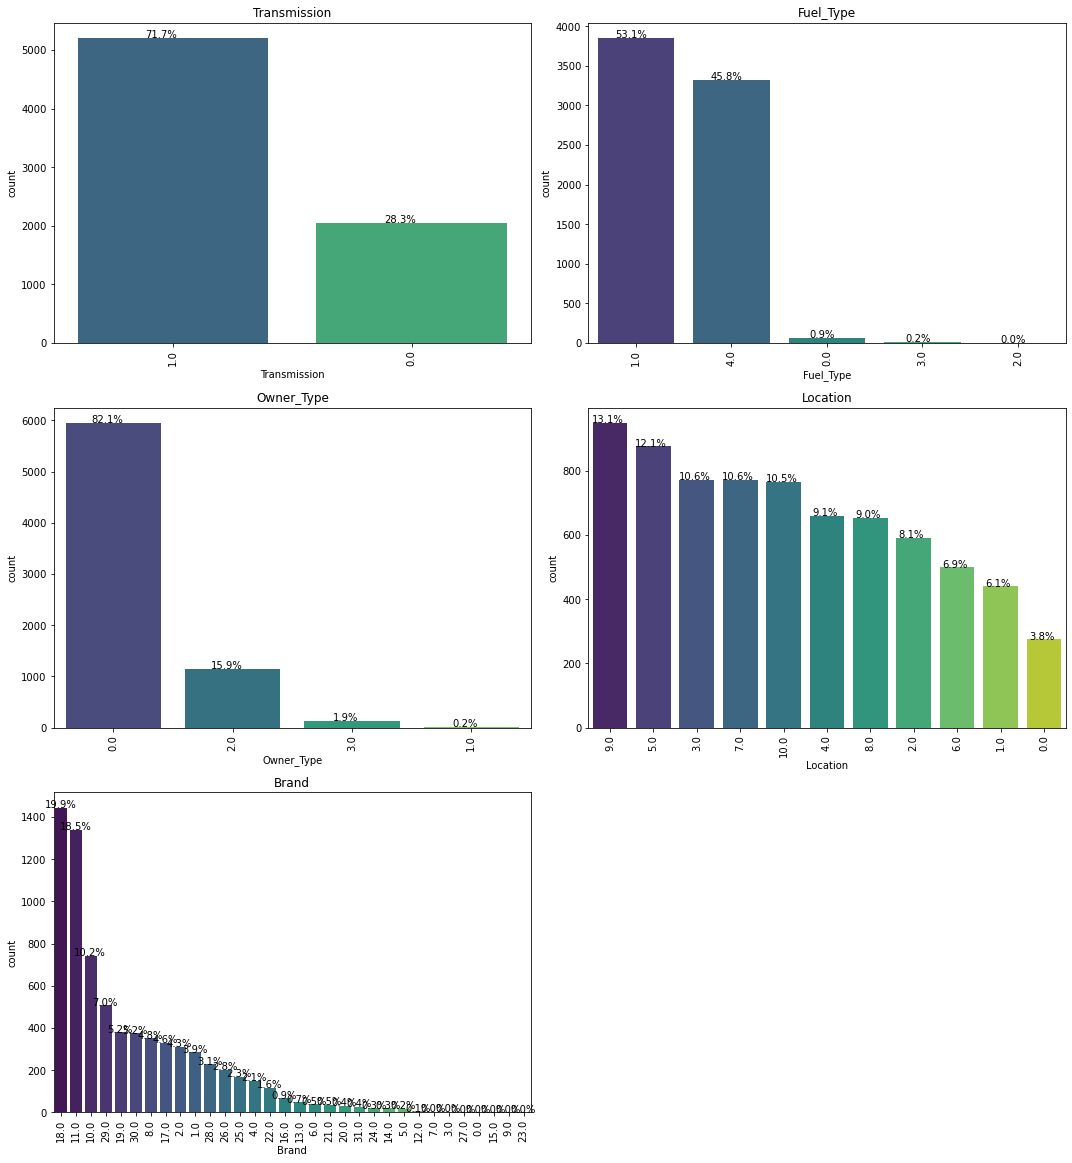

In [35]:
# Plotting categorical variables

plt.figure(figsize=(15,21))

for i, variable in enumerate(cat_cols):
                     plt.subplot(4,2,i+1)
                     order = df_imputed[variable].value_counts(ascending=False).index    
                     ax=sns.countplot(x=df_imputed[variable], data=df_imputed , order=order ,palette='viridis')
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_imputed[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.xticks(rotation=90)
                     plt.tight_layout()
                     plt.title(variable)

##### Observations

* ~71 % cars available for sell have manual Transmission.
* ~82 % cars are First owned cars.
* ~39% of car available for sale are from Maruti & Hyundai brands.
* ~53% of car being sold/avialable for purchase have fuel type as Diesel .
* Mumbai has highest numbers of car availabe for purchase whereas Ahmedabad has least


#### Splitting data in Train and Test for model building


In [36]:
# reverting log price to price since the final price prediction will not use log price.

df_imputed['Price'] = np.exp(df_imputed['Price'])

In [37]:

TargetVariable='Price'
Predictors=['Age', 'Kilometers_Driven', 'Fuel_Type', 'Owner_Type', 'Transmission', 'Mileage', 'Engine', 'Power', 'Seats', 'Brand']

X=df_imputed[Predictors].values
y=df_imputed[TargetVariable].values



In [38]:
### Sandardization of data 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Min Max Normalization 

PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set (70/30 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# Checking shape of data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5077, 10)
(5077,)
(2176, 10)
(2176,)


##### Random Forest Model

In [40]:

import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=5, n_estimators=100,criterion='mse')



In [41]:
# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

RandomForestRegressor(max_depth=5)


R2 Value: 0.8498839147688704
RMSE:  4.209780996235523

##### Model Validation and Accuracy Calculations ##########


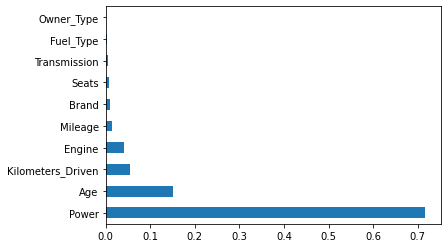

In [42]:

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))
print('RMSE: ',mean_squared_error(y_train,RF.predict(X_train),squared=False))

# Plotting the feature importance for ten most important variables
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')


print('\n##### Model Validation and Accuracy Calculations ##########')

In [43]:

# Print sample prediction values 
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

      Price  PredictedPrice
0  5.000000             6.0
1  4.342019             5.0
2  1.653162             2.0
3  3.885133             4.0
4  5.236245             7.0


In [44]:

# Calculate the error terms
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) 
print('Median Accuracy on test data:', MedianAccuracy)

Mean Accuracy on test data: 64.0213415516992
Median Accuracy on test data: 78.78787878787878


In [45]:

# Define function to calculate accuracy

def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

In [46]:

# Import cross validation function 
from sklearn.model_selection import cross_val_score

# Run 10-Fold Cross validation 

Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [68.31901703 68.88215824 68.29593424 68.76864965 65.55071602 68.17893677
 68.07757951 69.29993517 55.04040326 52.65735448]

Final Average Accuracy of the model: 65.31


#### XGBoost Model

In [47]:
import xgboost as xgb


# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=5, 
                      learning_rate=0.1, 
                      n_estimators=100, 
                      objective='reg:squarederror', 
                      booster='gbtree')

# Printing parameters of XGBoost
print(RegModel)

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=5,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)


In [48]:
# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

R2 Value: 0.9444180681494115
RMSE:  2.5616082122034793

##### Model Validation and Accuracy Calculations ##########


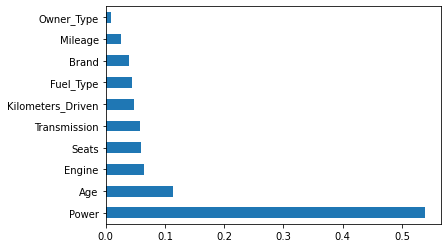

In [49]:
from sklearn import metrics
# Measure Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))
print('RMSE: ',mean_squared_error(y_train,XGB.predict(X_train),squared=False))

# Plot the feature importance for ten most important variables
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

print('\n##### Model Validation and Accuracy Calculations ##########')

In [50]:
# Print sample values 
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())


      Price  PredictedPrice
0  5.000000             5.0
1  4.342019             5.0
2  1.653162             2.0
3  3.885133             3.0
4  5.236245             8.0


In [51]:
# Calculate the error 
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) 
print('Median Accuracy on test data:', MedianAccuracy)

Mean Accuracy on test data: 71.14989804790379
Median Accuracy on test data: 82.35294117647058


In [52]:
# Define function to calculate accuracy

def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Import cross validation function 
from sklearn.model_selection import cross_val_score

# Run 10-Fold Cross validation on a given algorithm

Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [77.41094034 77.83220099 77.92457357 77.60729153 74.03872561 78.0334971
 76.95957409 78.21594866 59.08107652 55.03147908]

Final Average Accuracy of the model: 73.21


#### XGBoost yields slightly better accuracy than Random Forest

* This model will be used for hyperparameter tuning using the most important variables

In [53]:
# Separate out Target Variable and Predictor Variables
TargetVariable='Price'

# Predictor variables

Predictors=['Age', 'Power', 'Engine', 'Seats']

X=df_imputed[Predictors].values
y=df_imputed[TargetVariable].values

### Sandardize data 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

PredictorScaler=MinMaxScaler()

# Store fitted data 
PredictorScalerFit=PredictorScaler.fit(X)

# standardized value for X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(7253, 4)
(7253,)


In [54]:
# Import cross validation function 
from sklearn.model_selection import cross_val_score

# Use final hyperparameters

from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=10, 
                      learning_rate=0.1, 
                      n_estimators=100, 
                      objective='reg:squarederror', 
                      booster='gbtree')

# Run 10-Fold Cross validation 

Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [76.39686687 77.65412424 77.63684569 77.84447787 71.48130753 79.5134016
 76.76477525 79.52957394 57.27405834 53.14419485]

Final Average Accuracy of the model: 72.72


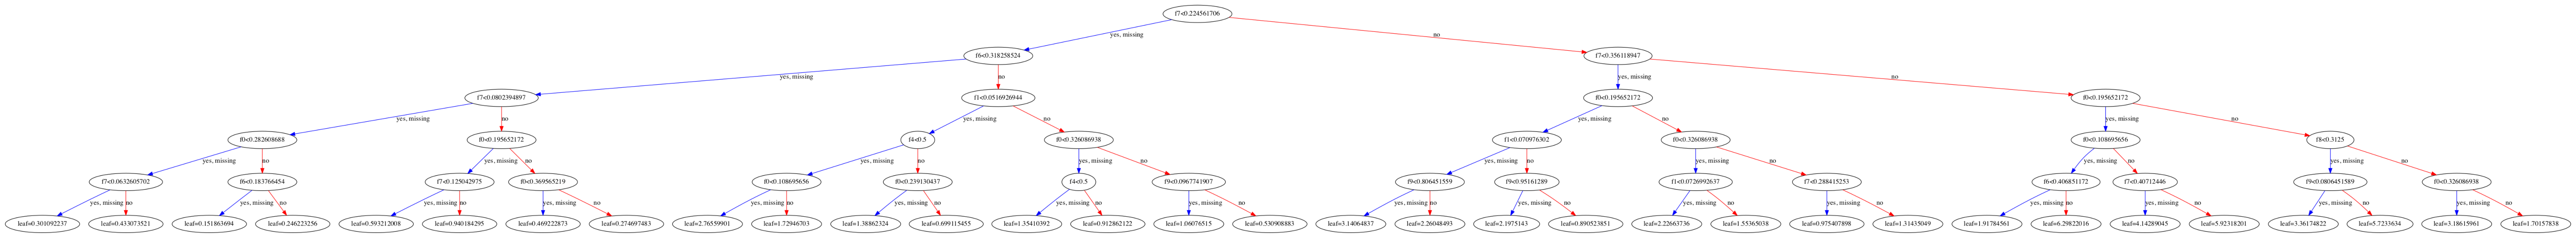

In [55]:
# plot decision tree for XGBoost
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree

fig, ax = plt.subplots(figsize=(100, 60))
#plot_tree(XGB, num_trees=10, ax=ax)
plot_tree(XGB, num_trees=0, ax=ax)
plt.show()

#### Observations

* The XGB Regression yielded higher accuracy than Random Forest, and the hyperparameter tuning for XGBoost was also  faster. 


In [152]:
# Exporting the imputed data from Pandas as a csv file

df_imputed.to_csv(r'/Users/*****/df_imputed.csv', index = False, header = True)

* References include sites such as Analytics Vidya, Kaggle and other sources